In [1]:
!pip install librosa --use-feature=2020-resolver

  Using cached numba-0.56.3-cp38-cp38-win_amd64.whl (2.5 MB)
  Using cached numba-0.56.2-cp38-cp38-win_amd64.whl (2.5 MB)
  Using cached numba-0.56.0-cp38-cp38-win_amd64.whl (2.5 MB)
  Attempting uninstall: resampy
    Found existing installation: resampy 0.4.2
    Uninstalling resampy-0.4.2:
      Successfully uninstalled resampy-0.4.2


In [8]:
import librosa
import librosa.display

import IPython.display as ipd

import numpy as np
import matplotlib.pyplot as plt

audio_path = './Soundtest/steth_20190801_09_46_05.wav'

In [9]:
ipd.Audio(audio_path)

In [10]:
# sr = 16000이 의미하는 것은 1초당 16000개의 데이터를 샘플링 한다는 것입니다. sampling rate=16000
y, sr = librosa.load(audio_path, sr=16000)

print('sr:', sr, ', audio shape:', y.shape)
print('length:', y.shape[0]/float(sr), 'secs')

sr: 16000 , audio shape: (240000,)
length: 15.0 secs


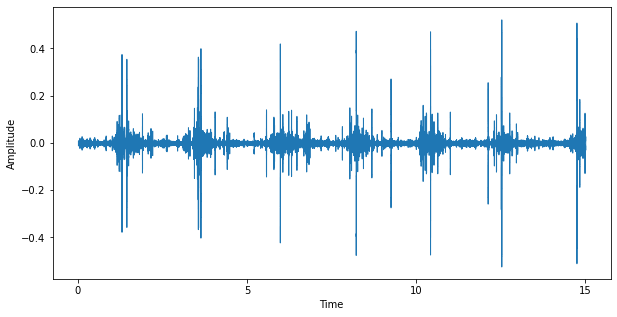

In [12]:
plt.figure(figsize = (10,5))
librosa.display.waveshow(y, sr=sr)
plt.ylabel("Amplitude")
plt.show()

2. FFT (Fast Fourier Transform)Permalink
Fourier Transform: time-domain의 그래프를 frequency-domain으로 변환시켜주는 작업

y파형을 주파수 분석을 통해, 특정 시간에 주파수 성분이 어떻게 구성되어 있는지 확인할 수 있다. 음성 데이터 분석을 할 때 주파수 분석 기법을 많이 사용한다.

numpy에 함수가 제공된다.

Text(0.5, 1.0, 'Power spectrum')

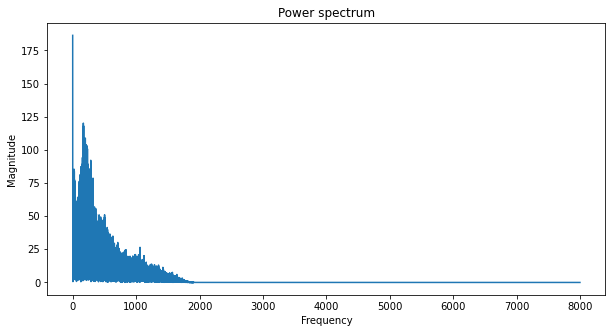

In [13]:
# Fourier -> Spectrum

fft = np.fft.fft(y)

magnitude = np.abs(fft) 
frequency = np.linspace(0,sr,len(magnitude))

left_spectrum = magnitude[:int(len(magnitude) / 2)]
left_frequency = frequency[:int(len(frequency) / 2)]

plt.figure(figsize = (10,5))
plt.plot(left_frequency, left_spectrum)
plt.xlabel("Frequency")
plt.ylabel("Magnitude")
plt.title("Power spectrum")

In [14]:
n_fft = 2048 
hop_length = 512 

stft = librosa.stft(y, n_fft = n_fft, hop_length = hop_length)
spectrogram = np.abs(stft)
print("Spectogram :\n", spectrogram)

Spectogram :
 [[1.7017974e-02 8.7342966e-01 2.1709047e-01 ... 1.0140094e+00
  1.4516203e+00 3.0037791e-01]
 [4.5229635e-01 1.2432545e+00 1.4919944e+00 ... 5.4551238e-01
  2.2962091e+00 1.7895124e+00]
 [9.1703522e-01 1.6702113e+00 8.6671633e-01 ... 3.8814039e+00
  3.0291965e+00 1.6263379e+00]
 ...
 [1.5633133e-05 7.8031380e-06 5.3223431e-08 ... 7.4010046e-08
  7.7827492e-05 1.4128664e-03]
 [1.5637512e-05 7.8281819e-06 4.5420219e-08 ... 1.0342759e-07
  7.8017802e-05 1.4130113e-03]
 [1.5629095e-05 7.7755012e-06 1.0637537e-08 ... 1.0014528e-07
  7.7898992e-05 1.4130707e-03]]


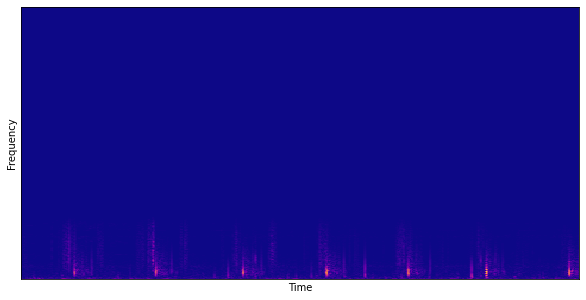

In [15]:
plt.figure(figsize = (10,5))
librosa.display.specshow(spectrogram, sr=sr, hop_length=hop_length)
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.plasma()
plt.show()

Log-spectogramPermalink
spectrogram : 시간에 따라 변화하는 신호의 주파수 스펙트럼의 크기를 시각적으로 표현한 것

보통 푸리에변환 이후 dB(데시벨) scaling을 적용한 Log-spectogram을 구한다. 다분히 시각적인 이유뿐만 아니라, 사람의 청각 또한 소리를 dB scale 로 인식하기 때문에, 이를 반영하여 spectogram을 나타내는 것이 분석에 용이하다.

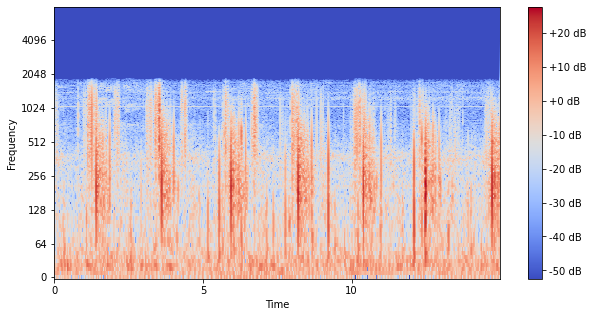

In [16]:
log_spectrogram = librosa.amplitude_to_db(spectrogram)

plt.figure(figsize = (10,5))
librosa.display.specshow(log_spectrogram, sr=sr, hop_length=hop_length, x_axis='time', y_axis='log')
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.colorbar(format="%+2.0f dB")


4. MFCC (Mel Frequency Cepstral Coefficient)Permalink
MFCC: 오디오 신호 처리 분야에서 많이 사용되는 소리 데이터의 특징값(Feature)

사람의 청각이 예민하게 반응하는 정보를 강조하여 소리가 가지는 고유한 특징을 추출한 값이다.

librosa.feature.mfcc(audio, sr, n_mfcc, n_fft, hop_length)

sr
default값은 22050Hz이다. 앞서 음성 데이터를 load 할 때 sr을 16000Hz으로 했기 때문에 꼭 sr=16000을 파라미터로 삽입해야 한다. (사람의 목소리는 대부분 16000Hz 안에 포함된다고 한다)

n_mfcc
return 될 mfcc의 개수를 정해주는 파라미터이다. default값은 20이다.

n_fft
win_length보다 길 경우 모두 zero padding해서 처리하기 위한 파라미터 default는 win_length와 같다.

일반적으로 자연어 처리에서는 음성을 25m의 크기를 기본으로 하고 있으며 16000Hz인 음성에서는 400에 해당하는 값이다. (16000 * 0.025 = 400) 즉, n_fft는 sr에 frame_length인 0.025를 곱한 값이다.

hop_length
얼마만큼 시간 주기를 이동하면서 분석을 할 것인지에 대한 파라미터, 10ms를 기본으로 하고 있어 16000Hz인 음성에서는 160에 해당한다.(16000 * 0.01 = 160) 즉, hop_length는 sr에 frame_stride인 0.01를 곱해서 구할 수 있다.

window_length가 0.025이고 frame_stride가 0.01이라고 하면 0.015초씩은 데이터를 겹치면서 읽는다고 생각하면 됩니다.

In [17]:
mfcc = librosa.feature.mfcc(y, sr=16000, n_mfcc=20, n_fft=n_fft, hop_length=hop_length)

print("MFCC Shape: ", mfcc.shape)
print("MFCC: \n", mfcc)

MFCC Shape:  (20, 469)
MFCC: 
 [[-5.2561432e+02 -4.9285294e+02 -4.8584714e+02 ... -4.5091083e+02
  -4.4379453e+02 -4.0279208e+02]
 [ 1.7636383e+02  2.0014041e+02  2.0319458e+02 ...  2.6066656e+02
   2.6488348e+02  2.5914124e+02]
 [ 2.7617327e+01  1.3812283e+01  6.1002440e+00 ...  6.7097672e+01
   6.1784012e+01  1.7842983e+01]
 ...
 [ 9.2647076e+00  6.4198337e+00  4.5746522e+00 ... -1.1379055e+00
  -1.6170106e+00 -3.7406485e+00]
 [ 3.8792729e-01 -7.3830390e-01 -3.7699118e+00 ... -6.1136494e+00
  -7.2610345e+00 -2.8253217e+00]
 [ 6.0804200e-01  7.0046526e-01 -9.2657101e-01 ... -2.4451387e+00
  -1.3206954e+00  1.1219385e+00]]


<ipython-input-17-27c226d10137>:1: FutureWarning: Pass y=[3.5091329e-05 5.3329615e-05 1.2262726e-04 ... 1.8243892e-02 1.3393410e-02
 7.2610988e-03] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(y, sr=16000, n_mfcc=20, n_fft=n_fft, hop_length=hop_length)


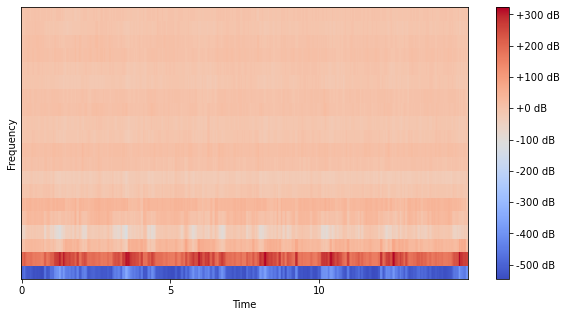

In [18]:
plt.figure(figsize = (10,5))
librosa.display.specshow(mfcc, sr=16000, hop_length=hop_length, x_axis='time')
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.colorbar(format='%+2.0f dB')
plt.show()